In [125]:
# MNIST is the most common dataset used for image classification.

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [126]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002188BBA8348>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002188B8DDDC8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002188BB35188>)

In [127]:
# training dataset
# 55000 images
# each image has 784 features

mnist.train.images.shape

(55000, 784)

In [128]:
# y label i.e. the output

mnist.train.labels.shape

(55000, 10)

In [129]:
mnist.train.labels

# value in the labels
# the output is one hot encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

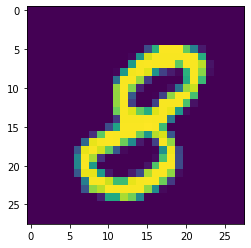

In [130]:
# plotting an image

import numpy as np
import matplotlib.pyplot as plt

first_image = mnist.train.images[5]
first_image = np.array(first_image,dtype='float')

# each image is 28*28 pixel and each feature represents one pixel intensity
# reshaping those 784 pixels to 28*28 pixel image

first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [131]:
a = tf.random_normal([1,2])
sess = tf.Session()
sess.run(a)

array([[-1.1384568, -1.9958551]], dtype=float32)

In [132]:
# creating the neural network

# each image has 784 features, so input layer will have 784 units
n_input = 784
n_hidden1 = 256
n_hidden2 = 256
n_classes = 10


weights = {'h1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
           'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
           'output':tf.Variable(tf.random_normal([n_hidden2,n_classes]))
           }

biases = {'h1':tf.Variable(tf.random_normal([n_hidden1])),
         'h2':tf.Variable(tf.random_normal([n_hidden2])),
         'output':tf.Variable(tf.random_normal([n_classes]))
         }

In [133]:
# defining function for forward propagation

def forward_propagation(x,weights,biases):
    
    in_layer1 = tf.add((tf.matmul(x,weights['h1'])),biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add((tf.matmul(out_layer1,weights['h2'])),biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add((tf.matmul(out_layer2,weights['output'])),biases['output'])
    return output

In [134]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

x = tf.placeholder('float',(None,n_input))
y = tf.placeholder(tf.int32,(None,n_classes))
pred = forward_propagation(x, weights, biases)

predictions = tf.argmax(pred,1)
true_labels = tf.argmax(y,1)

In [135]:
# finding the predictions
# also evaluating the true test labels

predictions_eval,labels = sess.run([predictions,true_labels],feed_dict={x:mnist.test.images,y:mnist.test.labels})
predictions_eval,labels

(array([4, 3, 0, ..., 0, 4, 0], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64))

In [136]:
correct_predictions = tf.equal(predictions_eval,labels)
correct_pred = sess.run(correct_predictions)

In [137]:
correct_pred.sum()

# so out of 10k images in test data, our NN predicts correctly for 1006 images

521

In [138]:
## checking for training data

correct_predictions = tf.equal(predictions, true_labels)
predictions_eval, label, correct_pred = sess.run([predictions,true_labels,correct_predictions],feed_dict={x:mnist.train.images,y:mnist.train.labels})
predictions_eval, label, correct_pred

(array([2, 0, 1, ..., 5, 4, 4], dtype=int64),
 array([7, 3, 4, ..., 5, 6, 8], dtype=int64),
 array([False, False, False, ...,  True, False, False]))

In [139]:
correct_pred.sum()
# so out of 55k training images, our NN predicts correctly for 4163 images.

3069

In [140]:
# adding soft max layer
# and calculating the loss using cross entropy loss function
# cost is the average of the loss function for the entire training/testing data
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred,labels = y))

In [141]:
# Now, we have to optimise the cost by changing the weights
# use an inbuilt optimiser
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [142]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [143]:
c = sess.run(cost,feed_dict={x:mnist.train.images,y:mnist.train.labels})
c

1487.2163

In [144]:
c,_ = sess.run([cost,optimize],feed_dict={x:mnist.train.images,y:mnist.train.labels})
c

1487.2163

In [145]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_12:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_13:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_14:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_15:0' shape=

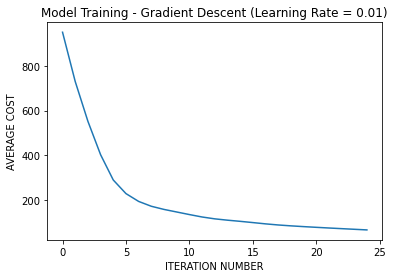

In [146]:
a = []
b= []
for i in range(25):
    a.append(i)
    c,_ = sess.run([cost,optimize],feed_dict={x:mnist.train.images,y:mnist.train.labels})
    b.append(c)

plt.plot(a,b)
plt.xlabel('ITERATION NUMBER')
plt.ylabel('AVERAGE COST')
plt.title('Model Training - Gradient Descent (Learning Rate = 0.01)')
plt.savefig('fig1.jpg')

In [147]:
predictions = tf.argmax(pred,1)
true_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,true_labels)
predictions, correct_predictions = sess.run([predictions,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})
correct_predictions.sum()

# accuracy improved to nearly 85%

8762

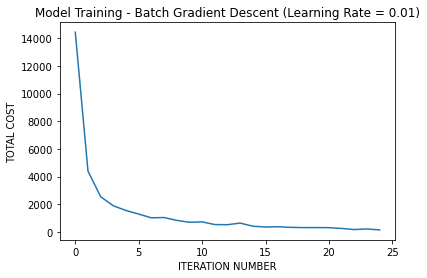

In [148]:
# Batch gradient descent
# batch size = 100
# total images = 55000
# so, we have 550 batches

batch_size = 100

a =[]
b =[]

for i in range(25):
    a.append(i)
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    b.append(total_cost)
    
plt.plot(a,b)
plt.xlabel('ITERATION NUMBER')
plt.ylabel('TOTAL COST')
plt.title('Model Training - Batch Gradient Descent (Learning Rate = 0.01)')
plt.savefig('fig2.jpg')

In [149]:
predictions = tf.argmax(pred,1)
true_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,true_labels)
predictions, correct_predictions = sess.run([predictions,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})
correct_predictions.sum()

# number of correct predictions improved
# 96% accuracy by doing batch updates

9681